In [53]:
import statsmodels as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1 

In [54]:
data = pd.read_csv("data.csv")
print("Rows:", data.shape[0], "Columns:", data.shape[1])

Rows: 30000 Columns: 19


Q2

In [55]:
print("No. of defaults:",data['default payment next month'].value_counts()[1])

No. of defaults: 6636


Q3

In [56]:
print("Default Rate:", data['default payment next month'].mean())

Default Rate: 0.2212


Q4

In [57]:
data_copy = data.loc[(data['BILL_AMT6']>0) & (data['Limit']>0) & (data['Debt']>31)]
print("Remaining Rows:", data_copy.shape[0], "Remaining Columns:", data_copy.shape[1])

Remaining Rows: 16434 Remaining Columns: 19


Q5

In [58]:
print("Default rate:",data_copy['default payment next month'].mean())

Default rate: 0.21504198612632347


Q6

In [59]:
data_copy['payment ratio']=(data_copy['PAY_AMT6']/data_copy['BILL_AMT6'])
print("Mean:",data_copy['payment ratio'].mean())
print("Minimum:",data_copy['payment ratio'].min())
print("Maximum:",data_copy['payment ratio'].max())

Mean: 1.7047184027756808
Minimum: 0.0
Maximum: 2643.33


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Q7

In [60]:
data_copy['credit limit']=(data_copy['Limit']/1000)
print("Before Rescaling: ")
print("Minimum:",data_copy['Limit'].min())
print("Maximum:", data_copy['Limit'].max())
print("Mean:", data_copy['Limit'].mean())
print("After Rescaling:")
print("Minimum:", data_copy['credit limit'].min())
print("Maximum:", data_copy['credit limit'].max())
print("Mean:", data_copy['credit limit'].mean())

Before Rescaling: 
Minimum: 10100
Maximum: 1000500
Mean: 186878.86576609468
After Rescaling:
Minimum: 10.1
Maximum: 1000.5
Mean: 186.87886576609466


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Q8

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


32.0
81.0
41.87550200803213


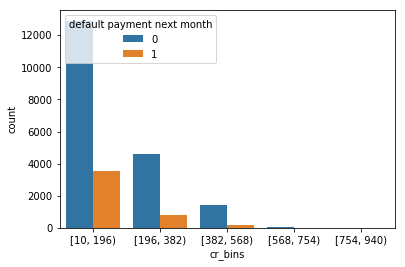

In [61]:
data_copy['pr_bins']=pd.cut(data_copy['payment ratio'],5,right =False)
ax = sns.countplot(x='pr_bins', hue='default payment next month', data=data_copy)
data_copy['cr_bins']=pd.cut(data_copy['credit limit'],range(10,1001,186),right =False)
sns.countplot(x='cr_bins', hue='default payment next month', data=data_copy)
print(data_copy['Debt'].min())
print(data_copy['Debt'].max())
print(data_copy['Debt'].mean())

Q9

/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


32.0
81.0
41.87550200803213


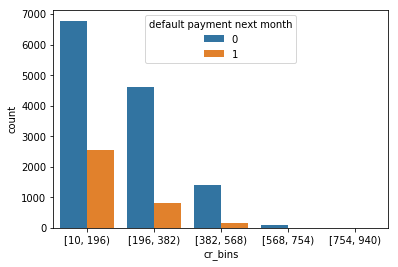

In [62]:
sns.countplot(x='cr_bins', hue='default payment next month', data=data_copy)
print(data_copy['Debt'].min())
print(data_copy['Debt'].max())
print(data_copy['Debt'].mean())

Q10

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


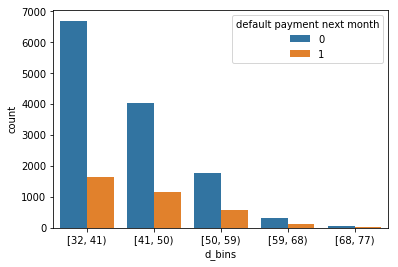

In [63]:
data_copy['d_bins']=pd.cut(data_copy['Debt'],range(32,81,9),right =False)
sns.countplot(x='d_bins', hue='default payment next month', data=data_copy)

Q11

In [64]:
print("a: No")
print("b: Yes")
print("c: Yes")

a: No
b: Yes
c: Yes


Q12

In [65]:
print("1st percentile for payment ratio:", data_copy['payment ratio'].quantile(0.01))
print("99th percentile for payment ratio:", data_copy['payment ratio'].quantile(0.99))
print("1st percentile for credit limit:", data_copy['credit limit'].quantile(0.01))
print("99th percentile for credit limit:", data_copy['credit limit'].quantile(0.99))
print("1st percentile for total debt:", data_copy['Debt'].quantile(0.01))
print("99th percentile for total debt:",data_copy['Debt'].quantile(0.99))

1st percentile for payment ratio: 0.0
99th percentile for payment ratio: 24.968390804597707
1st percentile for credit limit: 10.5
99th percentile for credit limit: 510.4
1st percentile for total debt: 32.0
99th percentile for total debt: 63.0


Q13

In [66]:
ul = data_copy['payment ratio'].quantile(0.99)
ll = data_copy['payment ratio'].quantile(0)
data_copy['win_pr'] = np.where(data_copy['payment ratio'] >= ul,ul,
np.where(data_copy['payment ratio'] <= ll,ll,data_copy['payment ratio']))
print("Comparing mean for payment ratio")
print(data_copy['payment ratio'].mean())
print(data_copy['win_pr'].mean())
ul = data_copy['credit limit'].quantile(0.99)
ll = data_copy['credit limit'].quantile(0)
data_copy['win_cl'] = np.where(data_copy['credit limit'] >= ul,ul,
np.where(data_copy['credit limit'] <= ll,ll,data_copy['credit limit']))
print("Comparing mean for credit limit")
print(data_copy['credit limit'].mean())
print(data_copy['win_cl'].mean())
ul = data_copy['Debt'].quantile(0.99)
ll = data_copy['Debt'].quantile(0)
data_copy['win_td'] = np.where(data_copy['Debt'] >= ul,ul,
np.where(data_copy['Debt'] <= ll,ll,data_copy['Debt']))
print("Comparing mean for total debt")
print(data_copy['Debt'].mean())
print(data_copy['win_td'].mean())

Comparing mean for payment ratio
1.7047184027756808
0.8605587242670684
Comparing mean for credit limit
186.87886576609466
185.93733601070952
Comparing mean for total debt
41.87550200803213
41.83388097845929


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/lib/python3/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Q14

In [67]:
data_copy['intercept'] = 1
print("Mean:",data_copy['intercept'].mean())

Mean: 1.0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Q15

In [68]:
from sklearn.model_selection import train_test_split
X = data_copy[['Debt', 'credit limit', 'intercept', 'payment ratio']]
y = data_copy['default payment next month']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train", len(X_train1))
print("X_test", len(X_test1))
print("y_train", len(y_train1))
print("y_test", len(y_test1))

X_train 13147
X_test 3287
y_train 13147
y_test 3287


Q16

In [69]:
X = pd.DataFrame()
y = pd.DataFrame()
X['Debt'] = data_copy['Debt']
X['Credit limit'] = data_copy['credit limit']
X['Intercept'] = data_copy['intercept']
X['Payment Ratio'] = data_copy['payment ratio']
y['default payment next month'] = data_copy['default payment next month']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train", len(X_train2))
print("X_test", len(X_test2))
print("y_train", len(y_train2))
print("y_test", len(y_test2))

X_train 13147
X_test 3287
y_train 13147
y_test 3287


Q17

In [70]:
import statsmodels.api as sm
model1 = sm.Logit(y_train1,X_train1)
result1 = model1.fit()
print(result1.summary())
print(np.exp(result1.params))

Optimization terminated successfully.
         Current function value: 0.501292
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                13147
Model:                                  Logit   Df Residuals:                    13143
Method:                                   MLE   Df Model:                            3
Date:                        Mon, 27 Jun 2022   Pseudo R-squ.:                 0.03826
Time:                                11:14:31   Log-Likelihood:                -6590.5
converged:                               True   LL-Null:                       -6852.7
Covariance Type:                    nonrobust   LLR p-value:                2.503e-113
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Debt              0.0091      0.003   

Q18

In [71]:
import statsmodels.api as sm
model2 = sm.Logit(y_train2,X_train2)
result2 = model2.fit()
print(result2.summary())
print(np.exp(result2.params))

Optimization terminated successfully.
         Current function value: 0.501292
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                13147
Model:                                  Logit   Df Residuals:                    13143
Method:                                   MLE   Df Model:                            3
Date:                        Mon, 27 Jun 2022   Pseudo R-squ.:                 0.03826
Time:                                11:14:31   Log-Likelihood:                -6590.5
converged:                               True   LL-Null:                       -6852.7
Covariance Type:                    nonrobust   LLR p-value:                2.503e-113
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Debt              0.0091      0.003   

Q19

In [72]:
print("a: Yes")
print("b: Yes")
print("c: Yes")

a: Yes
b: Yes
c: Yes


Q20

In [73]:
print("a: Yes")
print("b: Yes")
print("c: Yes")

a: Yes
b: Yes
c: Yes


Q21

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=0).fit(X_train1, y_train1)
print("AUC for train data", roc_auc_score(y_train1, logistic_model.predict_proba(X_train1)[:, 1]))
print("AUC for test data", roc_auc_score(y_test1, logistic_model.predict_proba(X_test1)[:, 1]))

AUC for train data 0.6408657434440338
AUC for test data 0.6279330719531726


Q22

In [81]:
from sklearn.metrics import roc_auc_score
print("AUC for new train data", roc_auc_score(y_train2, logistic_model.predict_proba(X_train2)[:, 1]))
print("AUC for new test data", roc_auc_score(y_test2, logistic_model.predict_proba(X_test2)[:, 1]))

AUC for new train data 0.6408657434440338
AUC for new test data 0.6279330719531726


Q23

In [82]:
print("No")

No


Q24

In [83]:
m = LogisticRegression(random_state=0).fit(X_train1, y_train1)
predicts = m.predict(X_train1)
probs = m.predict_proba(X_train1)
score = m.score(X_train1, y_train1)
predicted_default_rate = np.count_nonzero(predicts == 1) / (len(predicts))
print('Accuracy:', 100*score, '%')
print('Minimum Probability:', probs.min())
print('Maximum Probability:', probs.max())
print('Total Predicted Defaults:' , np.count_nonzero(predicts == 1))
print('Predicted default rate:', predicted_default_rate)

Accuracy: 78.44375142618088 %
Minimum Probability: 0.002831128469853428
Maximum Probability: 0.9971688715301465
Total Predicted Defaults: 0
Predicted default rate: 0.0


Q25

In [84]:
m2 = LogisticRegression(random_state=0).fit(X_train2, y_train2)
predicts2 = m2.predict(X_train2)
probs2 = m2.predict_proba(X_train2)
score = m2.score(X_train2, y_train2)
predicted_default_rate2 = np.count_nonzero(predicts2 == 1) / (len(predicts2))
print('Accuracy:', 100*score , '%')
print('Minimum Probability:', probs2.min())
print('Minimum Probability:', probs2.max())
print('Total Predicted Defaults:' , np.count_nonzero(predicts2 == 1))
print('Predicted default rate:', predicted_default_rate2)

Accuracy: 78.44375142618088 %
Minimum Probability: 0.002831128469853428
Minimum Probability: 0.9971688715301465
Total Predicted Defaults: 0
Predicted default rate: 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
